<center><h1>Практическая работа №4 Линейные модели</h1></center>

1. Для выпонения работы необходимо следовать инструкциям ниже. 
2. После каждого объяснения следует следует пустое поле с тегом (TO DO).
3. Поля с тегом (TO DO) необходимо заполнить своим примером
4. Выполняйте работу индивилуально и старайтесь меньше обращаться к агентам-помощникам

Линейные модели являются частью нейронных сетей. Обязательно их понимание и применение на практике 

<center><h2>Часть 1. Линейная регрессия<h2><center>

Линейные методы предполагают, что между признаками объекта (features) и целевой переменной (target/label) существует линейная зависимость

В основе линейных моделей лежит линейная функция
$$\large f(\vec x) = (\vec w, \vec x) +b, $$
где $(\vec w, \vec x)$ — скалярное произведение:

$$\large (\vec w, \vec x) = \sum_{i=1}^n{w_ix_i} = w_1x_1+w_2x_2+...+w_ix_i+ ... + w_nx_n$$

Предположим, у нас есть набор точек $\{(x_i, y_i)\}$.

Цель линейной регрессии — **поиск линии, которая наилучшим образом соответствует заданным точкам**. Напомним, что уравнение прямой:

$$\large f(x) = w⋅x + b,$$

где $w$ — характеризует наклон линии (в будущем мы будем называть значение $w$ весом, weight) а $b$ — её сдвиг по оси $y$ (bias). Таким образом, решение линейной регрессии определяет значения для $w$ и $b$ так, что $f(x)$ приближается как можно ближе к $y(x)$. Здесь $w$ и $b$ — **параметры модели**.

1. Сгенерируем данные для создания и обучения модели 

In [1]:
import numpy as np
def linFunction(x):
    return -25 *x+ 16

# Укажем количество точек для создания датасета
NumPoints = 100
#Зададим равномерное распредление точек по X в диапазоне [-10;10]
X = np.linspace(-10, 10, NumPoints)
#Добавим к каждой точке случайное число увеличенное в 40 раз 
y = linFunction(X) + np.random.randn(NumPoints) * 40


2. Изобразим реальный график фукции и сгенерированный набор данных

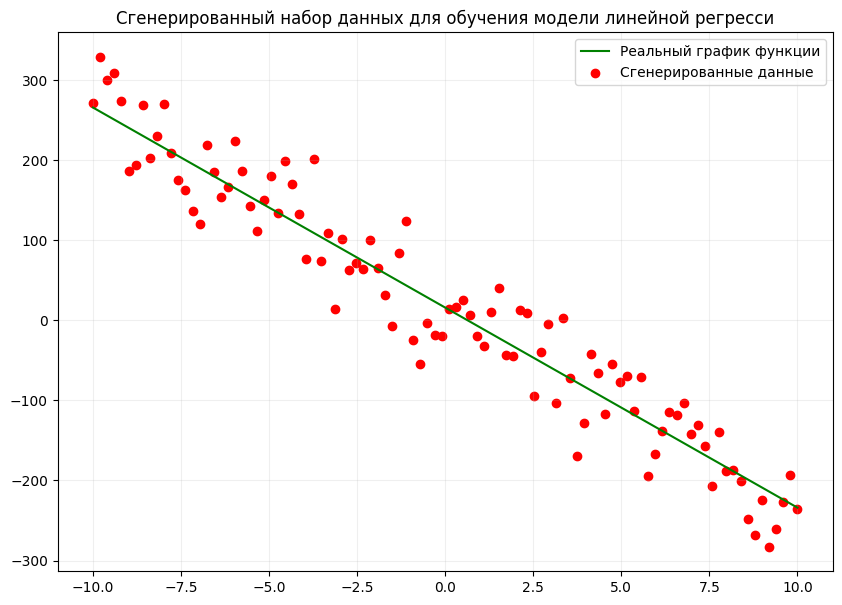

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(X, linFunction(X), label='Реальный график функции', c='g')
plt.scatter(X, y, label='Сгенерированные данные', c='r')

plt.title("Сгенерированный набор данных для обучения модели линейной регресси")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

3. Как правильно выбрать парамтры модели (то есть значения для $w$ и $b$) и с помошью них оценить качество полученного решения?

Будем использовать **Функцию потерь**. Она позволяет оценить ошибки при опредлении искомых параметров модели (то есть значений $w$ и $b$)


 Для задачи **регрессии** такой мерой может быть **расстояние** между предсказанным значением $f(x)$ и его фактическим значением.

 Распространенной функцией потерь является **средняя квадратичная ошибка** (MSE).

Мы определяем ошибку модели на одном объекте как квадрат расстояния $l_i$ между предсказанием $f(x_i)$ и истинным значением $y_i$, а общая функция потерь будет задана выражением:

$$l_i =|f(x_i)-y_i| $$

$$ \text{Loss} = \frac{1}{N}\sum l_i^2 = \frac{1}{N} \sum (f(x_i)-y_i)^2$$

Найдем **среднюю квадратичную ошибку** (MSE) для трех прямых 
1. для прямой с параметрами $w=-20$, $b = 15$ 
2. для прямой с параметрами $w=-25$, $b = 17$ 
3. для прямой с параметрами $w=-25$, $b = 16$ (верные значения):

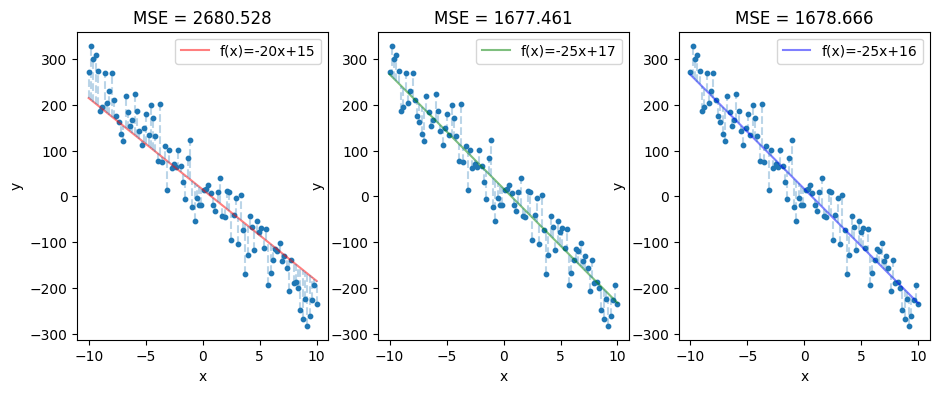

In [3]:

def plotDeltaMSE(ax, x, y, w, b, color="r"):
    #задаем функцию в общем виде
    y_predicted = w * x + b
    # Изображаем функцию в виде графика (линия)
    ax.plot(x, y_predicted, color=color, alpha=0.5, label=f"f(x)={w}x+{b}")
    # Для каждой пары x и y считаем разницу и отображаем на графике
    for x_i, y_i, f_x in zip(x, y, y_predicted):
        # Изображаем вертикальные линии на графике от точки до прямой
        ax.vlines(x=x_i, ymin=min(f_x, y_i), ymax=max(f_x, y_i), ls="--", alpha=0.3)
    # MSE Считаем общую функцию потерь (Loss)
    loss = np.sum((y - (w*x + b)) ** 2) / (len(x))
    # Отображаем Loss на графике
    ax.set_title(f"MSE = {loss:.3f}")
    ax.legend()


fig, axs = plt.subplots(1, 3, figsize=(11, 4))

# изобразим точки для пар значений x и y на двух графиках
for ax in axs:
    ax.scatter(X, y, s=10) # s=10 - размер маркера
    ax.set_xlabel("x")
    ax.set_ylabel("y")

#вызовем функцию
plotDeltaMSE(axs[0], X, y, w=-20, b=15)
plotDeltaMSE(axs[1], X, y, w=-25, b=17, color="g")
plotDeltaMSE(axs[2], X, y, w=-25, b=16, color="b")

plt.show()

Таким образом,

Задача **поиска оптимальных параметров** модели сводится к задаче **поиска минимума функции потерь**.

Минимизировать ошибку в свою очередь мы можжем несколькими методами - например аналитическим (методом наименьших квадратов) или методом градиентного спуска. Рассмотрим их особенности и способы применения 

<center><h3>Аналитический метод решения<h3><center>

Одним из аналитических методов решения является метод наименьших квадратов 
Минимизация ошибки по методу наименьших квадратов дает решение: $$ w = (X^TX)^{-1}X^TY $$

Реализуем класс линейной регрессии с помощью этой формулы.
1. Назовем класс MyLinearRegression
2. Опредлим три метода класса - fit (для обучения модели), predict (для геерации предсказанных значений), get_weights (для получения параметров модели)
3. Определим в методе класса инциализации два случая 
- fit_intercept = True - — это позволяет не добавлять в матрицу признаков столбец из единиц, что может быть полезно, например, при работе с данными, где нужно учитывать сдвиг относительно начала координат. 
- fit_intercept = False - в вычислениях не будет использоваться точка пересечения (данные ожидаются центрированными). 


In [4]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        #Задаем параметр fit_intercept (по умочанию - True)
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1

        n, k = X.shape

        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self

    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        # Не забудьте про фиктивный признак равный 1
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        w1=self.w
        return w1

In [5]:
from sklearn.model_selection import train_test_split
# выделим половину объектов на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

Визуализируем точки котрые попали в тестовый и обучающий наборы данных на графике

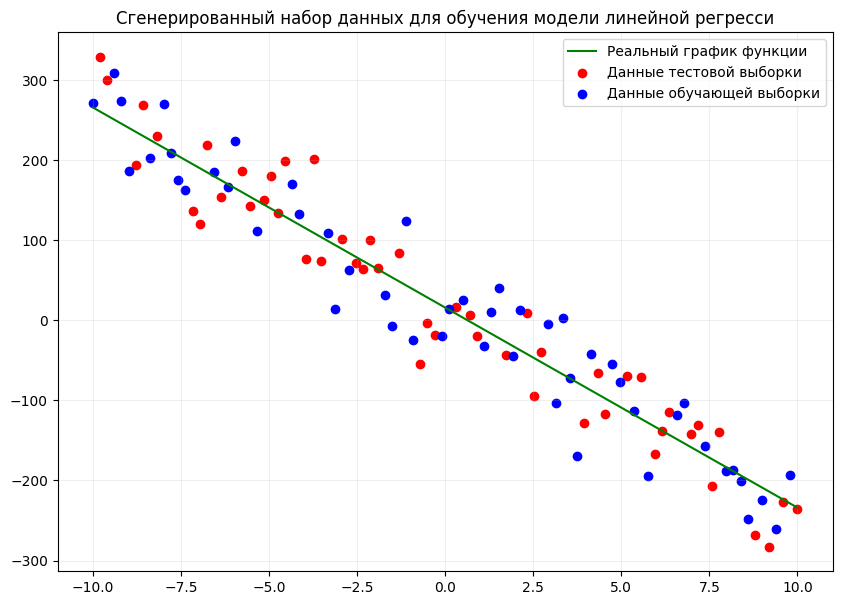

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(X, linFunction(X), label='Реальный график функции', c='g')
plt.scatter(X_test, y_test, label='Данные тестовой выборки', c='r')
plt.scatter(X_train, y_train, label='Данные обучающей выборки', c='b')

plt.title("Сгенерированный набор данных для обучения модели линейной регресси")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

Обучим модель на обучабщем наборе данных

In [7]:
myModelReg = MyLinearRegression()

myModelReg.fit(X_train[:, np.newaxis], y_train)


проверим модель на тестовых данных

In [8]:
predictions = myModelReg.predict(X_test[:, np.newaxis])
w1 = myModelReg.get_weights()
print(w1)

[-24.94683221  17.46773272]


Выведем резальтаты на трех графиках 
1. Общий для обучающей и тестовой выборки
2. Только для обучающей выборки
3. Только для тестовой выборки

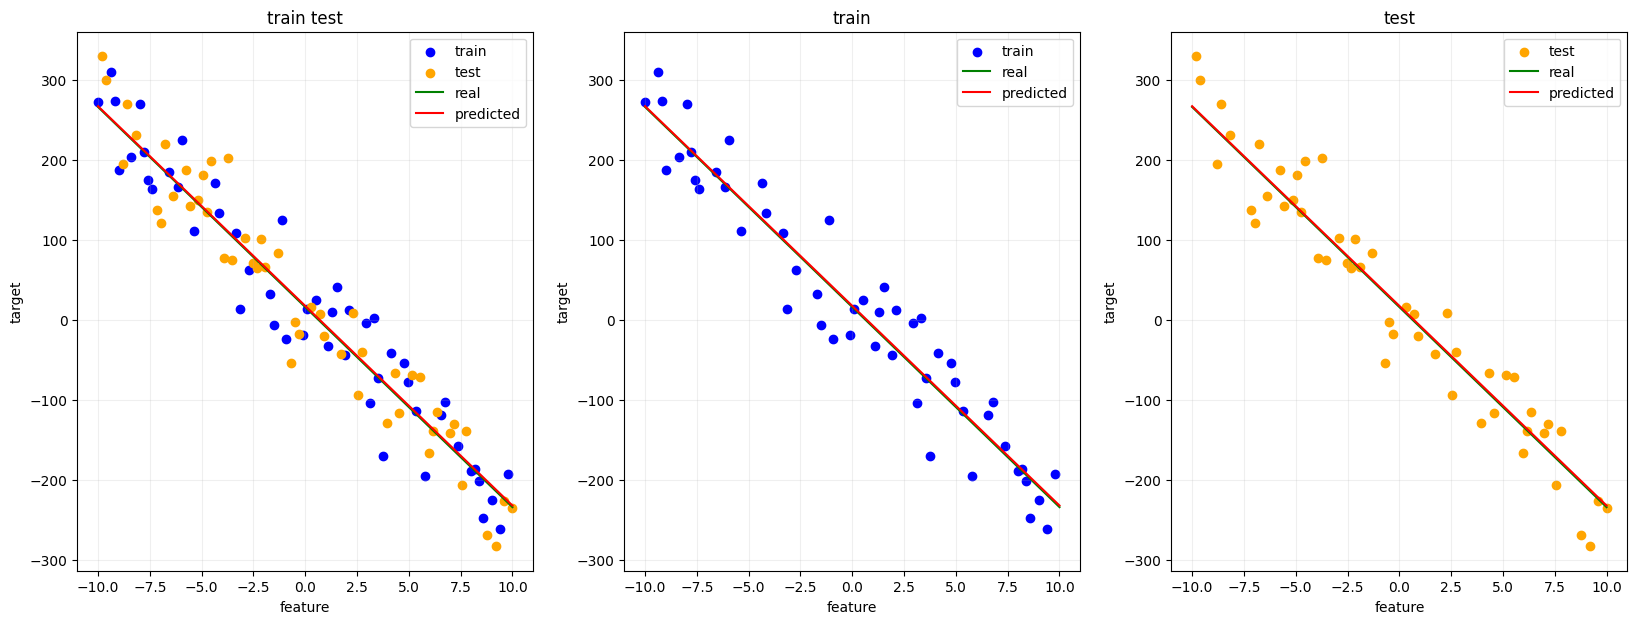

In [9]:
plt.figure(figsize=(20, 7))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, linFunction(X), label='real', c='g')
    plt.plot(X, myModelReg.predict(X[:, np.newaxis]), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

Теперь создадим модель для линейной регрессии воспользуясь библиотекой Sklearn

In [10]:
#импортируем библиоткеу
from sklearn.linear_model import LinearRegression
#задаем модель
SKLregressor = LinearRegression()
#обучаем модель
SKLregressor.fit(X_train[:, np.newaxis], y_train)
SKLregressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


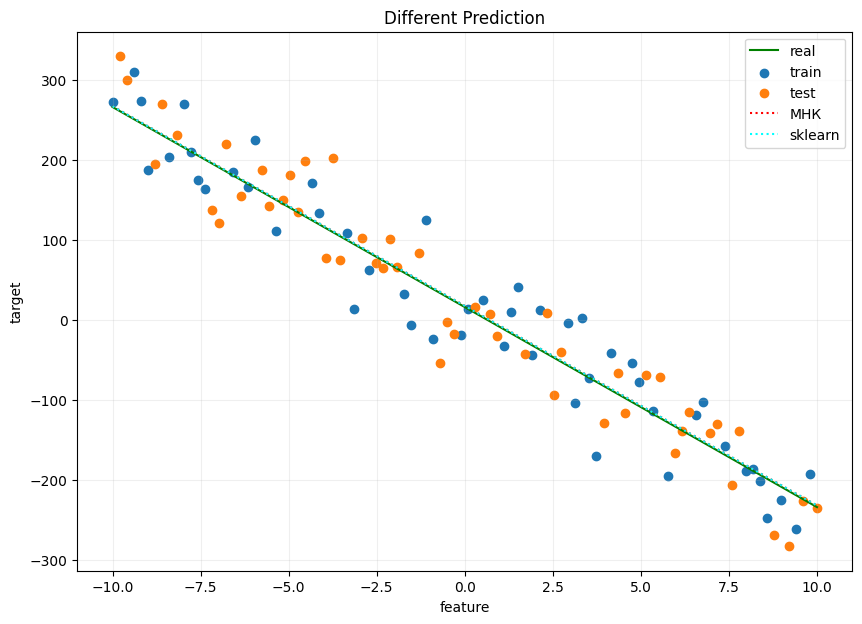

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(X, linFunction(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, myModelReg.predict(X[:, np.newaxis]), label='МНК', c='r', linestyle=':')
plt.plot(X, SKLregressor.predict(X[:, np.newaxis]), label='sklearn', c='cyan', linestyle=':')

plt.title("Different Prediction")
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

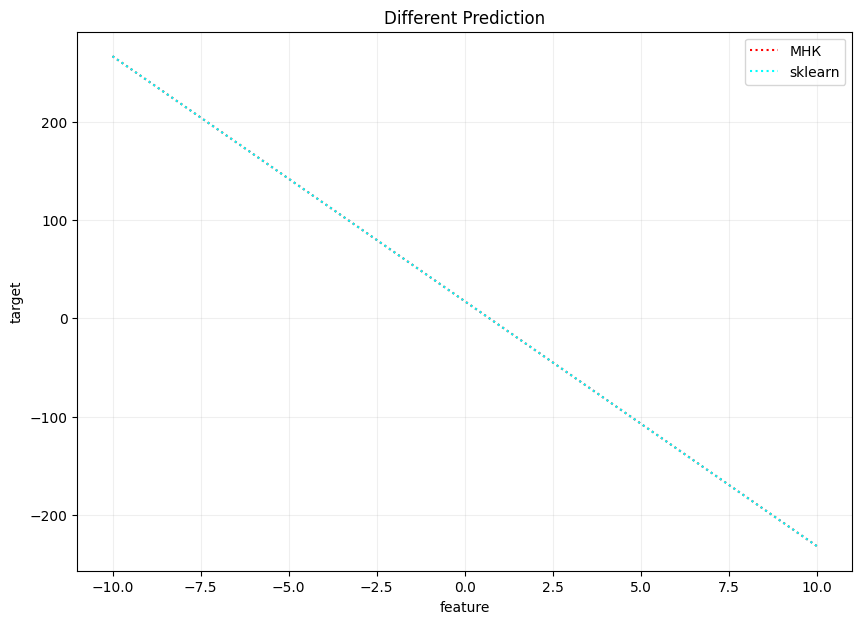

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(X, myModelReg.predict(X[:, np.newaxis]), label='МНК', c='r', linestyle=':')
plt.plot(X, SKLregressor.predict(X[:, np.newaxis]), label='sklearn', c='cyan', linestyle=':')
plt.title("Different Prediction")
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

Посчитаем метрики для наших значений:

In [13]:
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    r2_score,
)


def print_metrics(y_true, y_predicted):
    print(f"Mean squared error: {mean_squared_error(y_true, y_predicted):.3f}")
    print(
        "Root mean squared error: ",
        f"{root_mean_squared_error(y_true, y_predicted):.3f}",
    )
    print(f"Mean absolute error: {mean_absolute_error(y_true, y_predicted):.3f}")
    print(f"R2 score: {r2_score(y_true, y_predicted):.3f}")




In [14]:
y_pred = myModelReg.predict(X_test[:, np.newaxis])
print_metrics(y_test, y_pred)
y_pred = SKLregressor.predict(X_test[:, np.newaxis])
print_metrics(y_test, y_pred)

Mean squared error: 1954.458
Root mean squared error:  44.209
Mean absolute error: 34.501
R2 score: 0.911
Mean squared error: 1954.458
Root mean squared error:  44.209
Mean absolute error: 34.501
R2 score: 0.911


<center><h3>Метод градиентного спуска<h3><center>

Решение задачи линейной регрессии аналитически (МНК) не всегда возможно по нескольким причинам:
* Для аналитического решения нужно считать обратную матрицу, это вычислительно сложно и матрица бывает плохо определенной.
* Данных может быть слишком много для того, чтобы их можно было одновременно положить в память для расчета обратной матрицы.
* Модели могут быть слишком сложными для поиска аналитического решения. Для сложных моделей ландшафт функции потерь может иметь рельеф с несколькими локальными минимумами. Например, при использовании более сложных функций потерь или в случае использования моделей, нелинейных по своим параметрам.

Градиентый спуск заключается в
1. расчете $\displaystyle\frac{\partial{L}}{\partial{w}}$ -- градиента ошибки (значение целевой функции, то есть лосса $L(y_{pred}, y_{true})$) от значения параметров модели (весов $w$)
2. шаге спуска -- изменении весов $w$ в сторону антиградиента с некоторым коэффициентом $h$ (он же learning rate):
$$w := w - h\frac{\partial{L}}{\partial{w}}$$
3. Повторении п.1 и п.2 пока не наблюдается сходимость (изменения ошибки малы или отсутсвуют)

**Цель:** Реализуем новые классы линейной регрессии, в которой оптимизация проводится методами градиентного спуска.

**Предполагаемая зависимость:** $Y = Xw$, где $Y \in \mathbb{R}^{n\times 1}, X \in \mathbb{R}^{n\times m}, w \in \mathbb{R}^{m\times 1}$


**Минимизируемая функция:**
$$
L(y_{pred}, Y) = \frac{1}{n} ||y_{pred} - Y||^2 = \frac{1}{n}||Xw - Y||^2 = \frac{1}{n}(Xw - Y)^T(Xw - Y) = \frac{1}{n}(w^TX^TXw - 2Y^TXw + Y^TY)
$$

**Градиент относительно $w$:**
$$
\frac{\partial{L}}{\partial{w}} = \frac{2}{n}(X^TXw - X^TY) = \frac{2}{n}X^T(y_{pred} - Y) \,\, \in \mathbb{R}^{m \times 1}
$$

Напишем собственный класс Линейной регрессии по методу градиентного спуска

In [15]:
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    r2_score,
)
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None

    def fit(self, X, y, lr=0.01, max_iter=100):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!

        n, k = X.shape

        # случайно инициализируем веса
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)

        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X

        self.losses = []

        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self._calc_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def get_losses(self):
        return self.losses

Посчитаем предсказания на сгенерированном датасете

In [16]:
MyGradregressor = MyGradientLinearRegression(fit_intercept=True)

MyLoss=MyGradregressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = MyGradregressor.predict(X_test[:, np.newaxis])
w = MyGradregressor.get_weights()

In [17]:
print(w)

[-25.41769654  10.97868013]


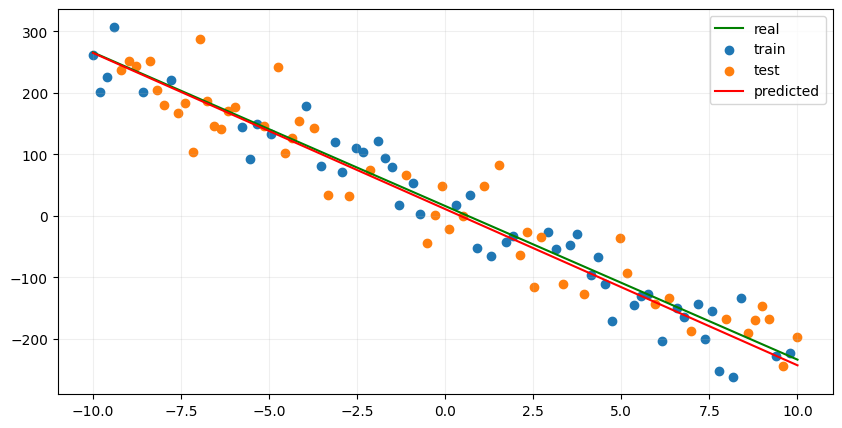

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(X, linFunction(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, MyGradregressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

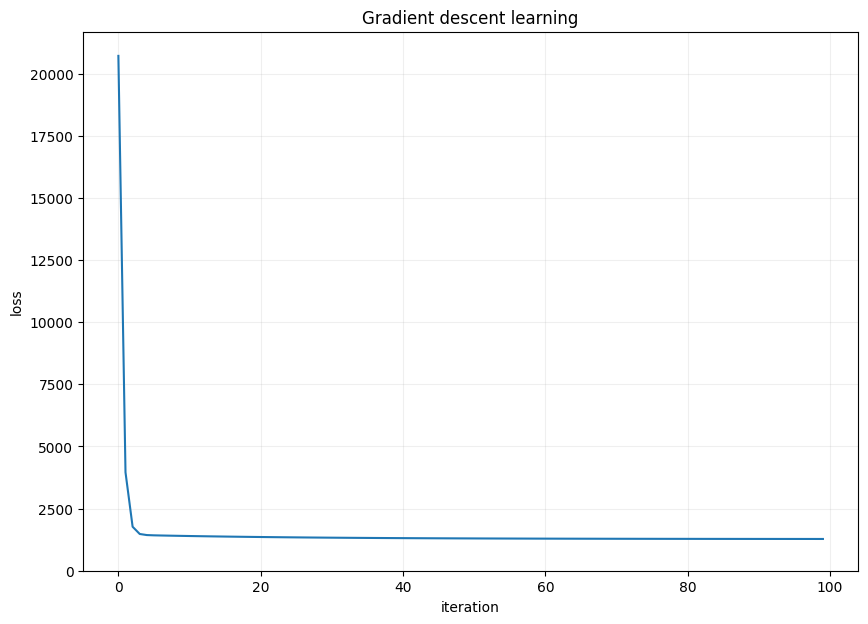

In [19]:
plt.figure(figsize=(10, 7))

plt.plot(MyLoss)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

### <font color="red">...(TO DO)...</font>

<font color="red"><p>
<br>1. По заданию преподавателя сделайте свою модель линейной регрессии 
<br>2. По заданию преподавателя сделайте свою модель для уравнения w1*x^2+w2*x+b. 
<br>3. Учтите, что обычная линейная регрессия может работать только с линейными зависимостями 
<br>4. Необходимо преобразовать задачу: нужно использовать полиномиальную регрессию (которая на самом деле является множественной линейной регрессией со степенями признака)
</p></font>

Поменяйте название функции, саму функцию и меру разброса данных вокруг значения (если необходимо)

In [ ]:
import numpy as np
def SqrFunction(x):
    return -25 * x+ 16
# Укажем количество точек для создания датасета
NumPoints = 100
#Зададим равномерное распредление точек по X в диапазоне [-10;10]
X = np.linspace(-10, 10, NumPoints)
#Добавим к каждой точке случайное число увеличенное в 40 раз 
y = SqrFunction(X) + np.random.randn(NumPoints) * 200

Внесите изменения чтобы корректно отображались графики значений полиномиальных функций 

In [ ]:
def plotDeltaMSE(ax, x, y, w, b, color="r"):
    #задаем функцию в общем виде
    y_predicted = w * x + b
    # Изображаем функцию в виде графика (линия)
    ax.plot(x, y_predicted, color=color, alpha=0.5, label=f"f(x)={w}x+{b}")
    # Для каждой пары x и y считаем разницу и отображаем на графике
    for x_i, y_i, f_x in zip(x, y, y_predicted):
        # Изображаем вертикальные линии на графике от точки до прямой
        ax.vlines(x=x_i, ymin=min(f_x, y_i), ymax=max(f_x, y_i), ls="--", alpha=0.3)
    # MSE Считаем общую функцию потерь (Loss)
    loss = np.sum((y - (w*x + b)) ** 2) / (len(x))
    # Отображаем Loss на графике
    ax.set_title(f"MSE = {loss:.3f}")
    ax.legend()


fig, axs = plt.subplots(1, 3, figsize=(11, 4))

# изобразим точки для пар значений x и y на двух графиках
for ax in axs:
    ax.scatter(X, y, s=10) # s=10 - размер маркера
    ax.set_xlabel("x")
    ax.set_ylabel("y")

#вызовем функцию
plotDeltaMSE(axs[0], X, y, w=-20, b=15)
plotDeltaMSE(axs[1], X, y, w=-25, b=17, color="g")
plotDeltaMSE(axs[2], X, y, w=-25, b=16, color="b")

plt.show()

In [ ]:
class MyLinearRegression: #ПЕРЕМЕНУЙТЕ ФУНКЦИЮ
    def __init__(self, fit_intercept=True):
        #Задаем параметр fit_intercept (по умочанию - True)
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1

        n, k = X.shape

        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1)))) #ДОБАВЬТЕ ПРИЗНАК X**2

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self

    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        # Не забудьте про фиктивный признак равный 1
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))#ДОБАВЬТЕ ПРИЗНАК X**2

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self): #СРАВНИТЕ С ПЕРВОЙ РЕАЛИЗАЦИЕЙ - ТЕПРЬ ВЫ ПОЛУЧАЕТЕ ТРИ КОЭФИЦЕНТА!!! ЭТО НЕОБХОДИМО УЧИТАЫВАТЬ В ДАЛЬНЕЙШЕМ ПРИ ОБРАЩЕНИИ К ФУНКЦИИ
        w1=self.w[0]
        w2=self.w[1]
        b=self.w[2]
        return w1,w2,b

In [ ]:
from sklearn.model_selection import train_test_split
# выделим половину объектов на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [ ]:
myModelPolyReg = TODO()

myModelPolyReg.fit(X_train[:, np.newaxis], y_train)

In [ ]:
predictions = myModelPolyReg.predict(X_test[:, np.newaxis])
w1 = myModelPolyReg.get_weights() # ВСПОМНИТЕ ПРО ТРИ КОЭФФИЦЕНТА И ПОМЕНЯЙТЕ ЭТУ ЧАСТЬ
print(w1)

<font color="red">Сделайте самостоятельно остальные графики и функцию по методу градиента</font>

Выполняя настройку полиномиальной регрессии sklearn воспользуйтесь  пунктом 1.1.18. Polynomial regression: extending linear models with basis functions
https://scikit-learn.org/stable/modules/linear_model.html